# Actividad para evaluación de 3er parcial

Dado lo aprendido a lo largo del semestre durante la materia (python, grafos, interpretación y análisis de conectividad)

El 3er parcial se evaluará a través de la actividad:
__Aplicación y análisis a un dataset__

__Dataset a utilizar__: https://physionet.org/content/eegmmidb/1.0.0/S001/#files-panel

# Rúbrica para evaluación de 3er parcial

Se evaluará:
- Que el script no contenga errores
- Que los resultados del script sean reproducibles, ie que puedan ser reproducibles en cualquier computadora
- El orden del código
- La lógica del código
- La *inferencia* empleada para los parámetros utilizados, tales como thresholds para filtrado de matriz, elección de thresholds para selección de alguna banda específica (alfa, beta, delta, etc.) 
- Los métodos utilizados, ie, si para construir la matriz de conectividad se utilizó coherencia espectral, PLV o correlación, que haya una razón de ello
- Los resultados mostrados, tales como mapas de calor, grafos 2D, grafos 3D, el mostrar comunidades, hubs, nodos proporcionales al grado, filtrado de matriz de
- Conclusión del análisis, ie, al finalizar el análisis dar una conclusión que resuma los resultados encontrados con una interpretación de los mismos
- Que el análisis haya sido aplicado a cada uno de los ensayos/archivos del dataset

In [2]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
from scipy import stats

from mi_modulo import *

In [3]:
ensayo3 = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4 = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3, sheet_name=None, index_col=0)
#sheet name lee todas las hojas, index col elimina la primera columna porque no son datos, son indices 1,2,3...
ensayo4_dict = pd.read_excel(ensayo4, sheet_name=None, index_col=0)


In [4]:
ensayos3_dfs= lista_dfs(ensayo3_dict)
ensayos4_dfs= lista_dfs(ensayo4_dict)

In [5]:
resultado3_df = capsula(ensayos3_dfs,0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs,0.5, 0.6)

### generar estadisticos para decidir umbrales 

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.060276


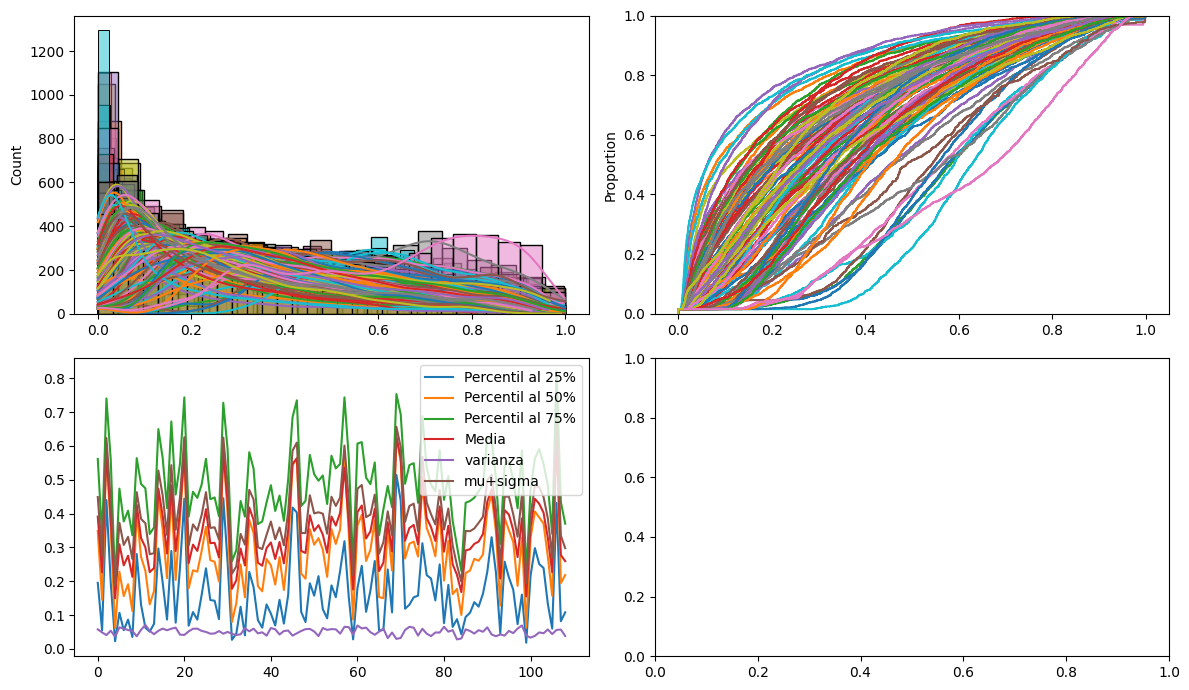

In [6]:
estadisticos3 = procesar_ensayos(ensayos3_dfs, hacer_plot=True)
df_3 = estadisticos3["estadisticos_df"]
df_3

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.060276


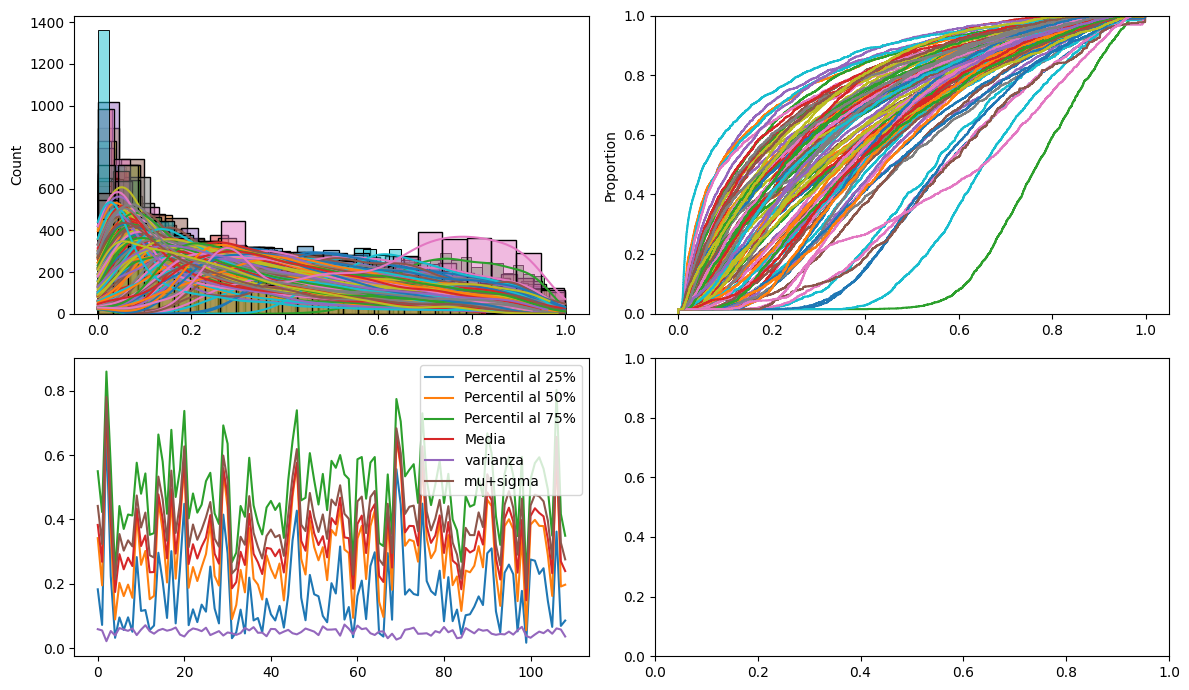

In [7]:
estadisticos4 = procesar_ensayos(ensayos4_dfs, hacer_plot=True)
df_4 = estadisticos3["estadisticos_df"]
df_4

Text(0.5, 1.0, 'Mapa de calor para comparativa de umbrales, poblacion>50%')

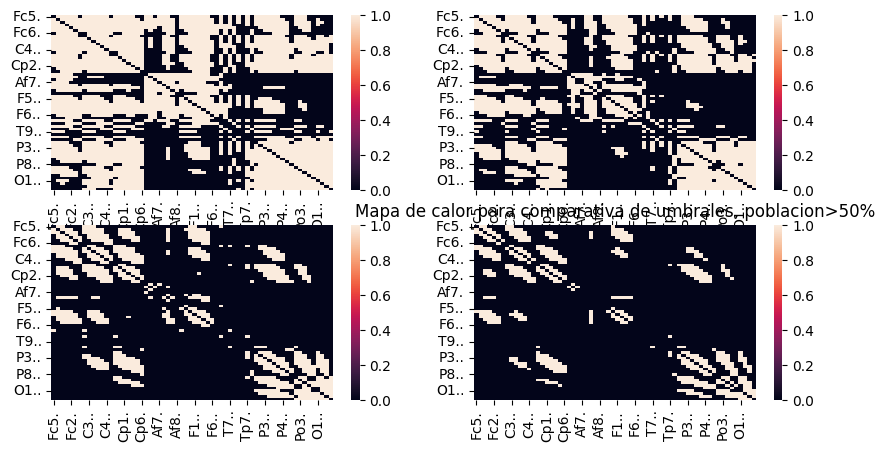

In [8]:
## umbrales para ensayo 3
resultado_df1 = capsula(ensayos3_dfs,0.2, 0.6)
resultado_df2 = capsula(ensayos3_dfs,0.3, 0.6)
resultado_df3 = capsula(ensayos3_dfs,0.5, 0.6)
resultado_df4 = capsula(ensayos3_dfs,0.6, 0.6)

fig, axes = plt.subplots(2,2, figsize=(10,5))

sns.heatmap(resultado_df1, ax=axes[0,0])
sns.heatmap(resultado_df2, ax=axes[0,1])
sns.heatmap(resultado_df3, ax=axes[1,0])
sns.heatmap(resultado_df4, ax=axes[1,1])
plt.title('Mapa de calor para comparativa de umbrales, poblacion>50%')

#debemos decidir de que manera decidir el umbral

Text(0.5, 1.0, 'Mapa de calor para comparativa de umbrales, poblacion>50%')

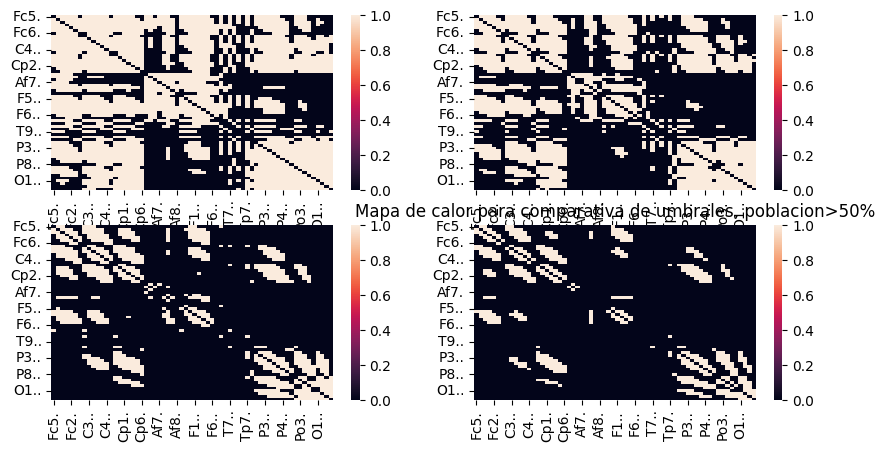

In [9]:
# umbrales para ensayo 4
resultado4_df1 = capsula(ensayos4_dfs,0.2, 0.7)
resultado4_df2 = capsula(ensayos4_dfs,0.3, 0.7)
resultado4_df3 = capsula(ensayos4_dfs,0.4, 0.7)
resultado4_df4 = capsula(ensayos4_dfs,0.6, 0.7)

fig, axes = plt.subplots(2,2, figsize=(10,5))

sns.heatmap(resultado_df1, ax=axes[0,0])
sns.heatmap(resultado_df2, ax=axes[0,1])
sns.heatmap(resultado_df3, ax=axes[1,0])
sns.heatmap(resultado_df4, ax=axes[1,1])
plt.title('Mapa de calor para comparativa de umbrales, poblacion>50%')

#debemos decidir de que manera decidir el umbral

## Generacion de resultados
Despues del analisis realizado, utilizando los mapas de calor, para poder escoger un threshold adecuado y un porcentaje de la poblacion que cumpla 
dicho umbral; se procedera a generar los resultados 
* grafo 2d
* grafo 3d
* metricas de grafo
* grafico de comunidades con hub

In [10]:
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado_df3)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df3)


In [11]:
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [12]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

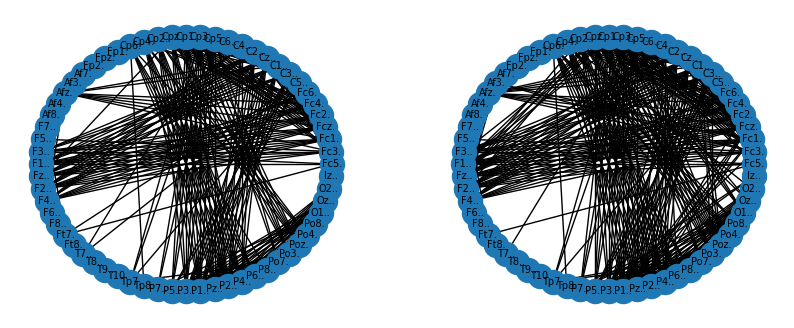

In [13]:
# Grafo2 para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado_df3, axes[0])
ensayo_grafo = grafo2D(resultado4_df3, axes[1])

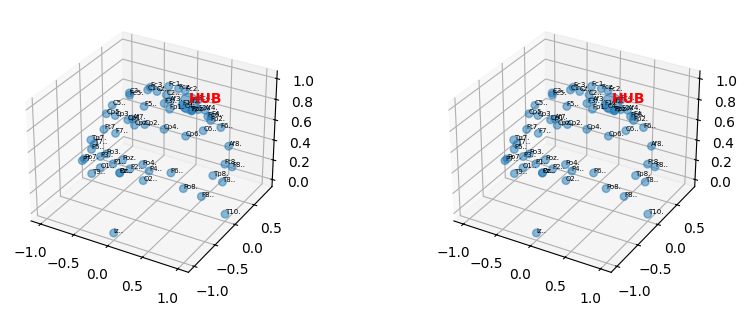

In [14]:
# Grafo3D para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub3, axes[0])
grafo3D(eeg_coords, hub4, axes[1])

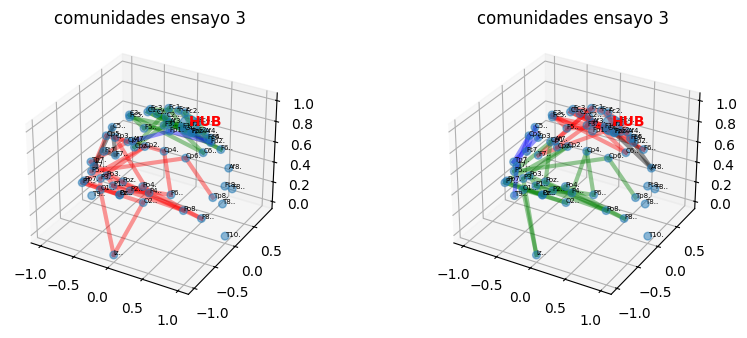

In [15]:
# Comunidades para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])

# Ensayos 5 y 6

In [16]:
ensayo5 = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6 = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\eeg-motor-movementimagery_Ensayo_06.xlsx"
coordenadas_csv = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S04_parciales\proyecto\MI_coordinates.csv"

ensayo5_dict = pd.read_excel(ensayo5, sheet_name=None, index_col=0)
#sheet name lee todas las hojas, index col elimina la primera columna porque no son datos, son indices 1,2,3...
ensayo6_dict = pd.read_excel(ensayo6, sheet_name=None, index_col=0)


In [17]:
ensayos5_dfs= lista_dfs(ensayo5_dict)
ensayos6_dfs= lista_dfs(ensayo6_dict)

In [32]:
resultado5_df = capsula(ensayos5_dfs,0.5, 0.6)
resultado6_df = capsula(ensayos6_dfs,0.4, 0.7)

,th25,th50,th75,promedio,mu_sigma
min,0.017846,0.057751,0.205711,0.149197,0.187056
max,0.522739,0.651729,0.805549,0.634132,0.662407
mediana,0.152787,0.293580,0.500263,0.345151,0.399663
cosa_rara,0.070700,0.086319,0.075435,0.066217,0.066465


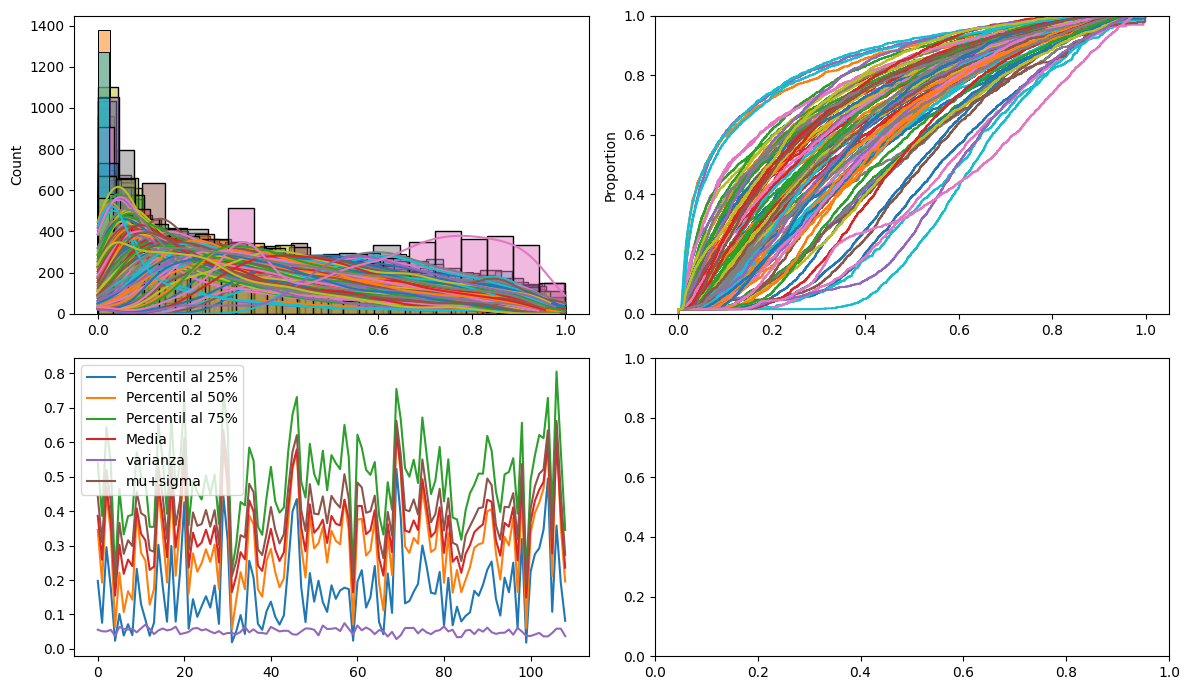

In [33]:
estadisticos5 = procesar_ensayos(ensayos5_dfs, hacer_plot=True)
df_5 = estadisticos5["estadisticos_df"]
df_5

,th25,th50,th75,promedio,mu_sigma
min,0.018750,0.043536,0.202194,0.153129,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.677091
mediana,0.144532,0.276807,0.493891,0.333420,0.389303
cosa_rara,0.061041,0.074638,0.070225,0.058393,0.058424


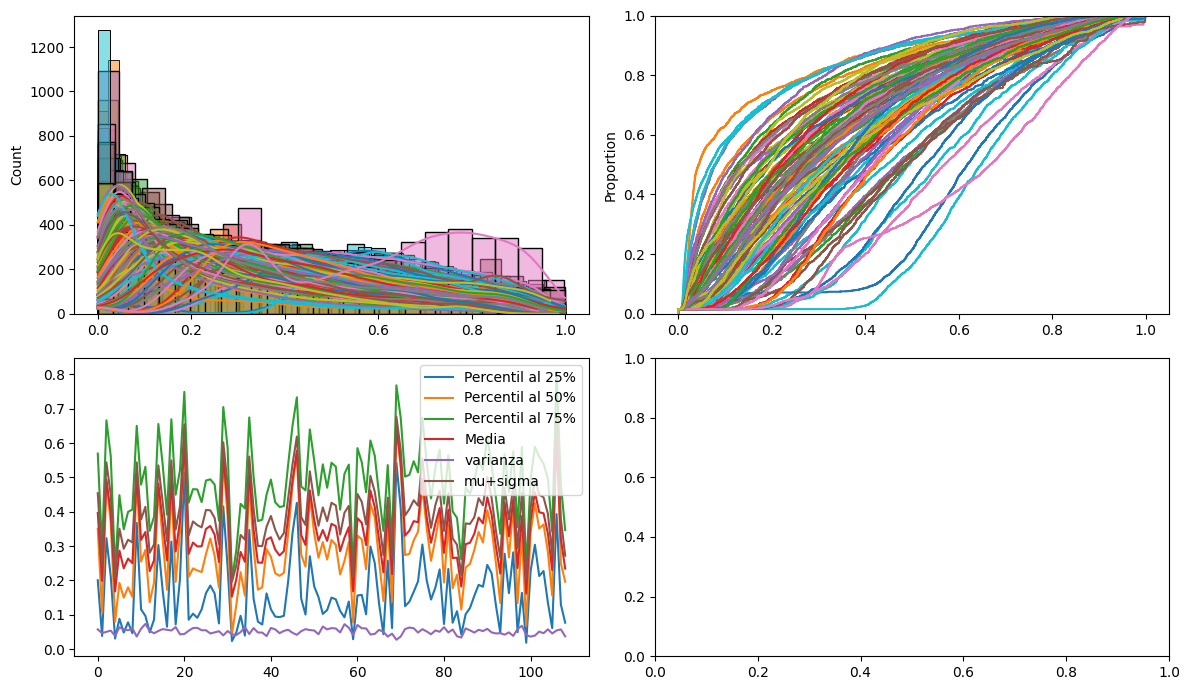

In [20]:
estadisticos6 = procesar_ensayos(ensayos6_dfs, hacer_plot=True)
df_6 = estadisticos6["estadisticos_df"]
df_6

Text(0.5, 1.0, 'Mapa de calor para comparativa de umbrales, poblacion>50%')

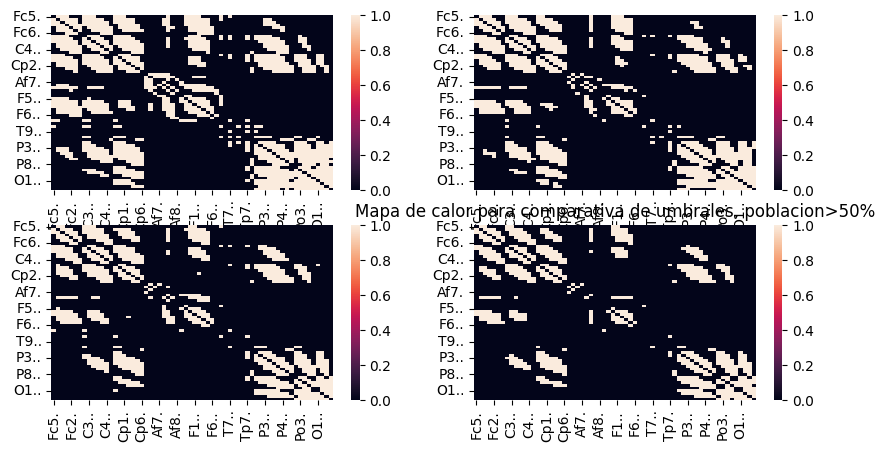

In [30]:
## umbrales para ensayo 3
resultado5_df1 = capsula(ensayos5_dfs,0.4, 0.6)
resultado5_df2 = capsula(ensayos5_dfs,0.4, 0.7)
resultado5_df3 = capsula(ensayos5_dfs,0.5, 0.6)
resultado5_df4 = capsula(ensayos5_dfs,0.5, 0.7)

fig, axes = plt.subplots(2,2, figsize=(10,5))

sns.heatmap(resultado5_df1, ax=axes[0,0])
sns.heatmap(resultado5_df2, ax=axes[0,1])
sns.heatmap(resultado5_df3, ax=axes[1,0])
sns.heatmap(resultado5_df4, ax=axes[1,1])
plt.title('Mapa de calor para comparativa de umbrales, poblacion>50%')

#debemos decidir de que manera decidir el umbral

Text(0.5, 1.0, 'Mapa de calor para comparativa de umbrales, poblacion>50%')

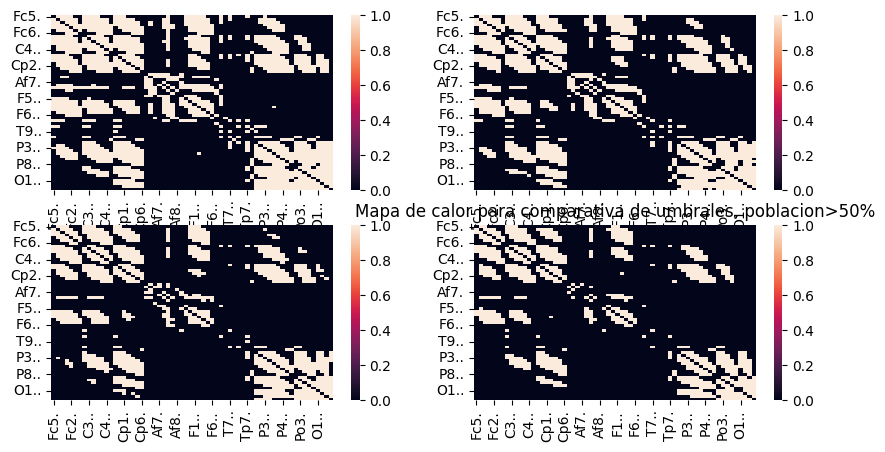

In [31]:
## umbrales para ensayo 6
resultado6_df1 = capsula(ensayos6_dfs,0.3, 0.7)
resultado6_df2 = capsula(ensayos6_dfs,0.4, 0.6)
resultado6_df3 = capsula(ensayos6_dfs,0.4, 0.7)
resultado6_df4 = capsula(ensayos6_dfs,0.5, 0.6)

fig, axes = plt.subplots(2,2, figsize=(10,5))

sns.heatmap(resultado6_df1, ax=axes[0,0])
sns.heatmap(resultado6_df2, ax=axes[0,1])
sns.heatmap(resultado6_df3, ax=axes[1,0])
sns.heatmap(resultado6_df4, ax=axes[1,1])
plt.title('Mapa de calor para comparativa de umbrales, poblacion>50%')

#debemos decidir de que manera decidir el umbral

In [34]:
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df3)
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df3)


In [35]:
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

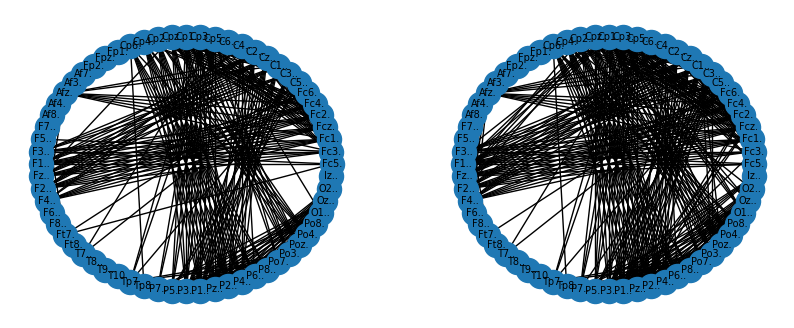

In [36]:
# Grafo2 para ensayos 5 y 6
hub3 = betwenness_5[0]
hub4 = betwenness_6[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo5_grafo = grafo2D(resultado5_df3, axes[0])
ensayo6_grafo = grafo2D(resultado6_df3, axes[1])

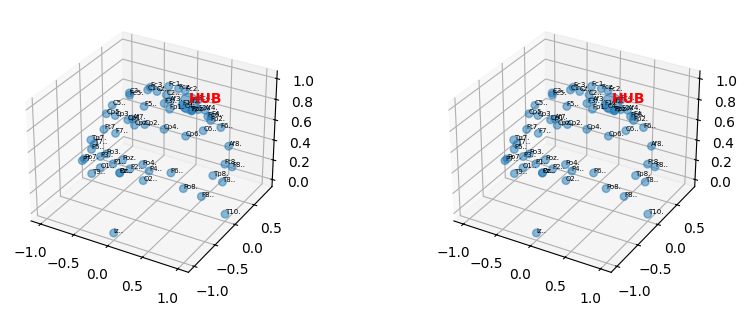

In [28]:
# Grafo3D para ensayos 5 y 6
hub5 = betwenness_5[0]
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub5, axes[0])
grafo3D(eeg_coords, hub6, axes[1])

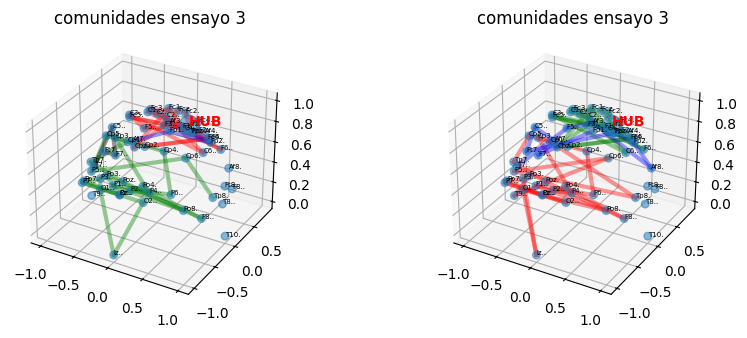

In [38]:
# Comunidades para ensayos 5 y 6
hub5 = betwenness_5[0]
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_5, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_6, hub4, eeg_coords, axes[1])